## Template - Random Forest
Dataset - Wine Quality regression dataset (https://www.kaggle.com/yasserh/wine-quality-dataset?select=WineQT.csv)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 200)

In [3]:
!cd

C:\Users\Starl\Documents\William Project\Machine Learning


## Load Data

In [4]:
data_file = "Datasets/wineQT.csv"

In [5]:
df = pd.read_csv(data_file)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
df.set_index('Id', inplace=True)

In [9]:
df.shape

(1143, 12)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


## Data Explore

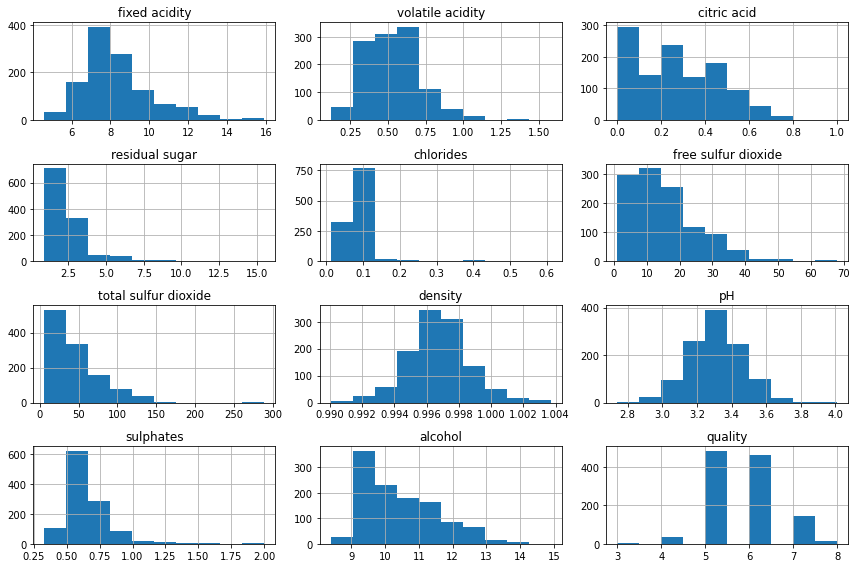

In [13]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

## Data Clean

## Data Preprocessing & Feature Engineering

In [67]:
# add log1p features for skewed features
skewed_cols = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']
for col in skewed_cols:
    df['log1p_' + col] = np.log1p(df[col])

In [68]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,log1p_citric acid,log1p_residual sugar,log1p_chlorides,log1p_free sulfur dioxide,log1p_total sulfur dioxide,log1p_sulphates
Id,,,,,,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000000,1.064711,0.073250,2.484907,3.555348,0.444686
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.000000,1.280934,0.093490,3.258097,4.219508,0.518794
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.039221,1.193922,0.088011,2.772589,4.007333,0.500775
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.444686,1.064711,0.072321,2.890372,4.110874,0.457425
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.000000,1.064711,0.073250,2.484907,3.555348,0.444686


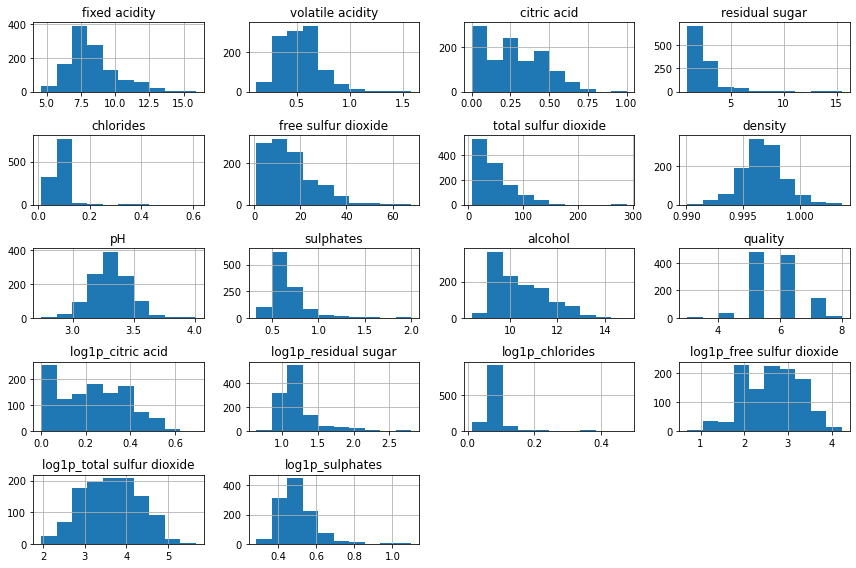

In [70]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

## Model Training

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [25]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=5)

In [26]:
reg = RandomForestRegressor(n_estimators=100,
                            min_samples_leaf=5)

In [27]:
reg.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5)

In [28]:
predictions = reg.predict(X_validation)

In [35]:
print("RMSE: ", mean_squared_error(y_validation, predictions)**0.5)

RMSE:  0.6467745827776116


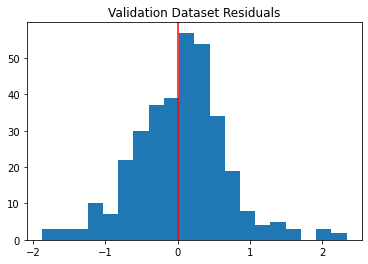

In [38]:
residuals = predictions - y_validation
plt.hist(residuals, bins=20)
plt.axvline(0, color='r')
plt.title("Validation Dataset Residuals")
plt.show()

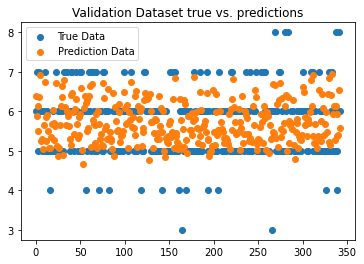

In [42]:
id_lst = np.arange(len(y_validation))
plt.scatter(id_lst, y_validation, label="True Data")
plt.scatter(id_lst, predictions, label="Prediction Data")
plt.title("Validation Dataset true vs. predictions")
plt.legend()
plt.show()

## Feature Importance

In [44]:
feature_importance_df = pd.DataFrame({"Feature Name": X_train.columns, "Feature Importance": reg.feature_importances_})

In [45]:
feature_importance_df.sort_values("Feature Importance", ascending=False)

,Feature Name,Feature Importance
10,alcohol,0.353732
9,sulphates,0.153913
1,volatile acidity,0.132326
6,total sulfur dioxide,0.072629
2,citric acid,0.050810
0,fixed acidity,0.048594
4,chlorides,0.045018
7,density,0.040004
8,pH,0.039416
5,free sulfur dioxide,0.038240


In [64]:
top5_features = feature_importance_df.sort_values("Feature Importance", ascending=False).iloc[:5]['Feature Name'].tolist()

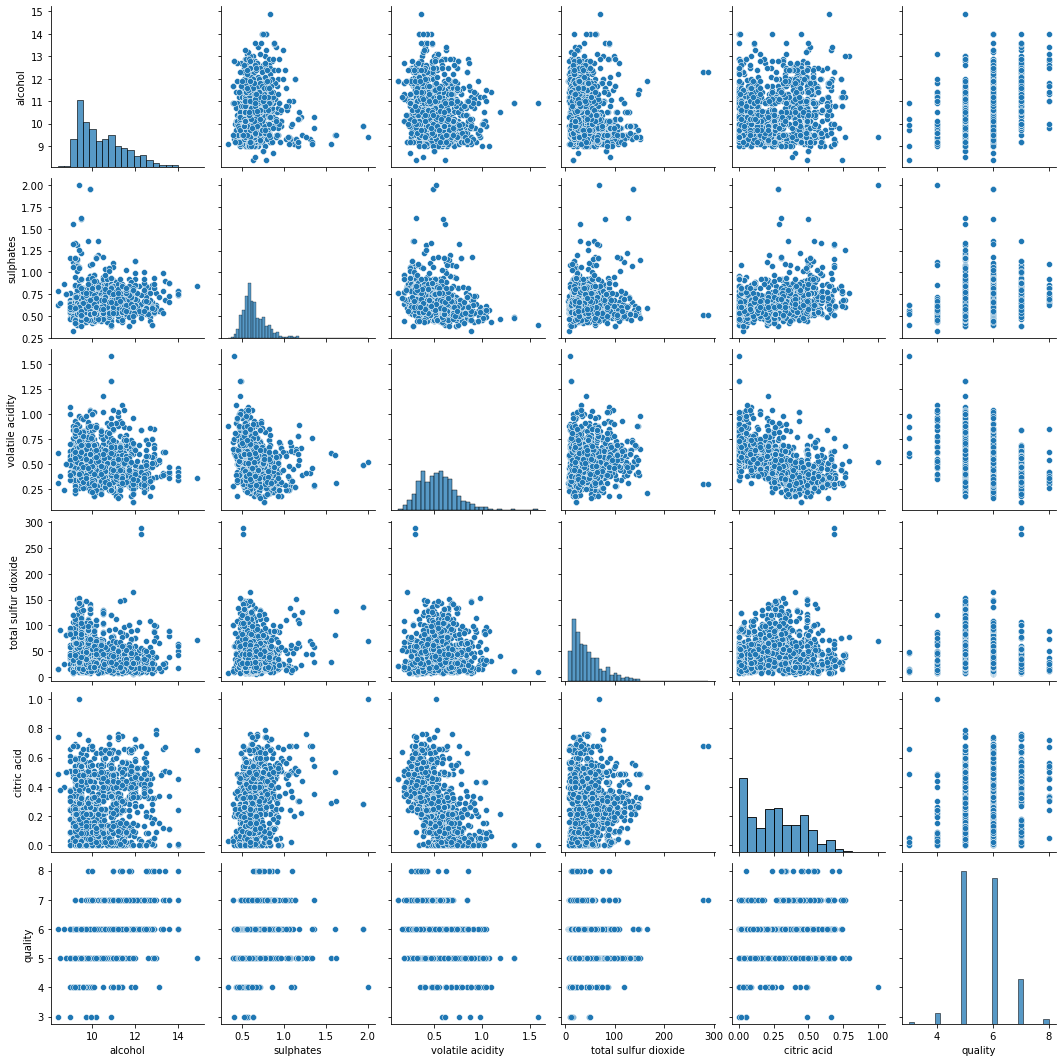

In [65]:
sns.pairplot(df[top5_features+['quality']])
plt.show()

## Model Training After Feature Engineering

In [76]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=5)

In [83]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,log1p_citric acid,log1p_residual sugar,log1p_chlorides,log1p_free sulfur dioxide,log1p_total sulfur dioxide,log1p_sulphates
Id,,,,,,,,,,,,,,,,,
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.9998,3.48,0.54,9.8,0.215111,1.280934,0.083422,2.564949,4.543295,0.431782
511,10.0,0.590,0.31,2.2,0.090,26.0,62.0,0.9994,3.18,0.63,10.2,0.270027,1.163151,0.086178,3.295837,4.143135,0.488580
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.9994,3.47,0.53,9.9,0.019803,2.186051,0.115113,4.234107,4.828314,0.425268
135,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.9965,3.19,0.82,9.6,0.104360,1.064711,0.086178,2.833213,4.158883,0.598837
404,7.7,0.690,0.05,2.7,0.075,15.0,27.0,0.9974,3.26,0.61,9.1,0.048790,1.308333,0.072321,2.772589,3.332205,0.476234


In [78]:
reg = RandomForestRegressor(n_estimators=100,
                            min_samples_leaf=5)

In [79]:
reg.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5)

In [80]:
predictions = reg.predict(X_validation)

In [81]:
print("RMSE: ", mean_squared_error(y_validation, predictions)**0.5)

RMSE:  0.6478493593603688


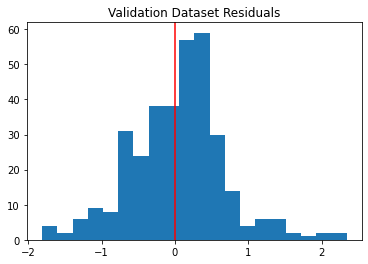

In [82]:
residuals = predictions - y_validation
plt.hist(residuals, bins=20)
plt.axvline(0, color='r')
plt.title("Validation Dataset Residuals")
plt.show()